In [ ]:
import pandas as pd
import numpy as np

ufos = pd.read_csv('./data/ufos.csv')
ufos.head()

In [ ]:
ufos = pd.DataFrame({'Seconds': ufos['duration (seconds)'], 'Country': ufos['country'],'Latitude': ufos['latitude'],'Longitude': ufos['longitude']})
ufos.Country.unique()

In [ ]:
ufos.dropna(inplace=True)
ufos = ufos[(ufos['Seconds'] >= 1) & (ufos['Seconds'] <= 60)]
ufos.info()


from sklearn.preprocessing import LabelEncoder

ufos['Country'] = LabelEncoder().fit_transform(ufos['Country'])
ufos.head()

In [ ]:
from sklearn.model_selection import train_test_split

Selected_features = ['Seconds','Latitude','Longitude']
X = ufos[Selected_features]
y = ufos['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

In [ ]:
import pickle
model_filename = 'ufo-model.pkl'
pickle.dump(model, open(model_filename,'wb'))

model = pickle.load(open('ufo-model.pkl','rb'))
print(model.predict([[50,44,-12]]))

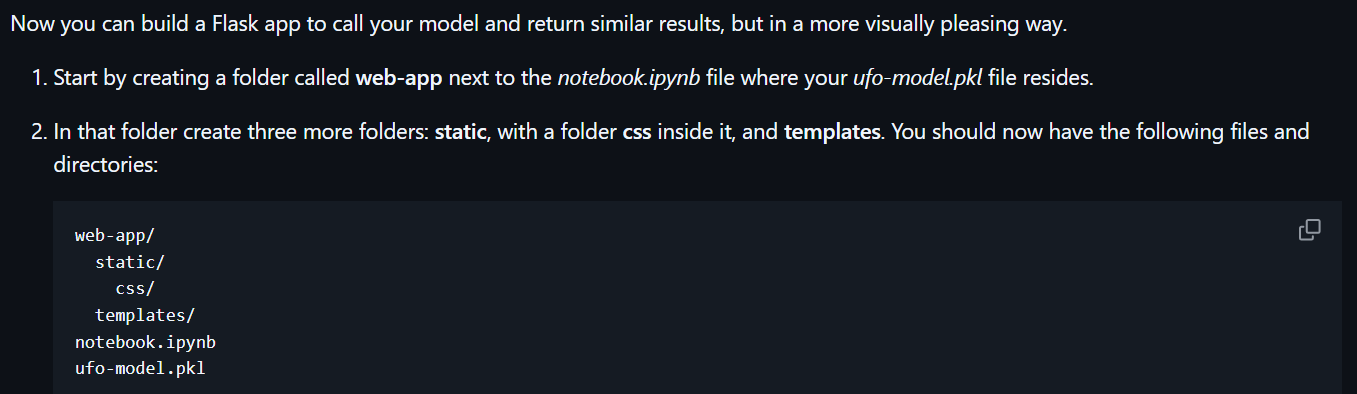